Concatinating all csv files

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/matches/all_matches.csv', low_memory=False)

In [6]:
df[df['winner_id'] == 103720]['winner_name']

3         Lleyton Hewitt
17        Lleyton Hewitt
24        Lleyton Hewitt
28        Lleyton Hewitt
108       Lleyton Hewitt
               ...      
173753    Lleyton Hewitt
173794    Lleyton Hewitt
174167    Lleyton Hewitt
174176    Lleyton Hewitt
174218    Lleyton Hewitt
Name: winner_name, Length: 619, dtype: object

In [ ]:
df[df['winner_id'] == 103900]['winner_name']

In [3]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

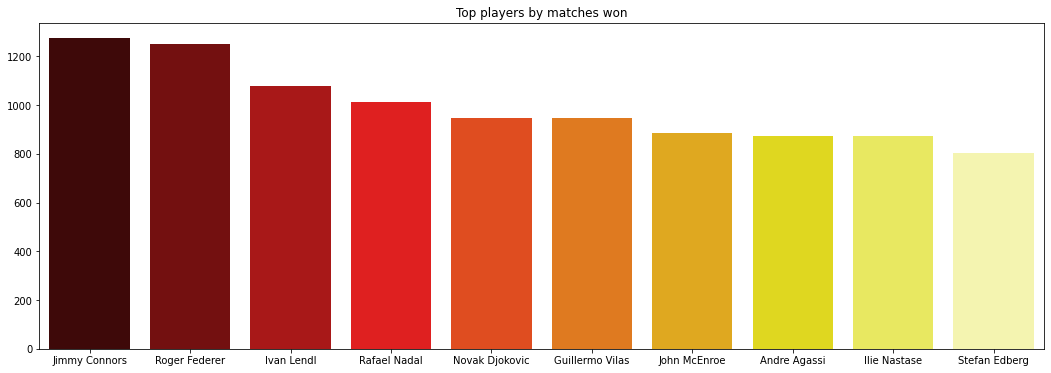

In [4]:
plt.subplots(figsize=(18,6))
sns.barplot(x = df['winner_name'].value_counts()[:10].index,y = df['winner_name'].value_counts()[:10].values,palette='hot')
plt.title('Top players by matches won')
plt.show()

In [5]:
(df.nlargest(10,['w_ace']))['winner_name'].values

array(['John Isner', 'Ivo Karlovic', 'John Isner', 'Ivo Karlovic',
       'Ivo Karlovic', 'Ivo Karlovic', 'Gilles Muller', 'Roger Federer',
       'Kevin Anderson', 'John Isner'], dtype=object)

In [6]:
(df.nlargest(10,['w_ace']))['w_ace'].values

array([113.,  75.,  64.,  61.,  53.,  53.,  51.,  50.,  49.,  49.])

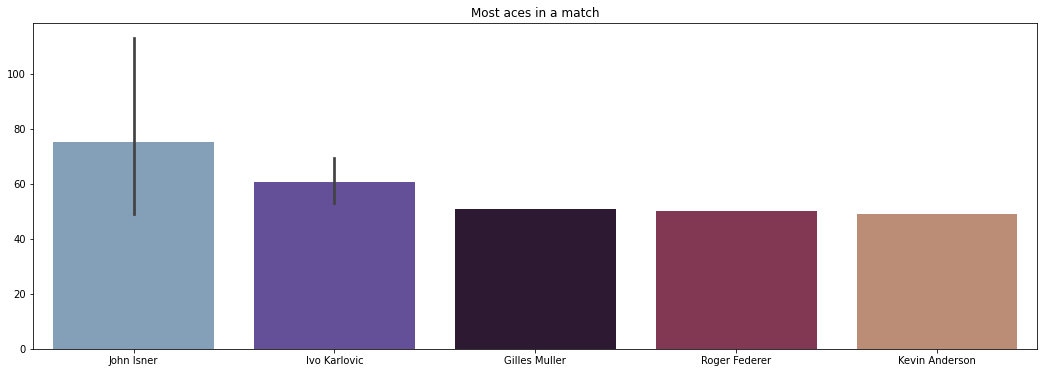

In [7]:
plt.subplots(figsize=(18,6))
sns.barplot(x = (df.nlargest(10,['w_ace']))['winner_name'].values,y = (df.nlargest(10,['w_ace']))['w_ace'].values,palette='twilight')
plt.title('Most aces in a match')
plt.show()

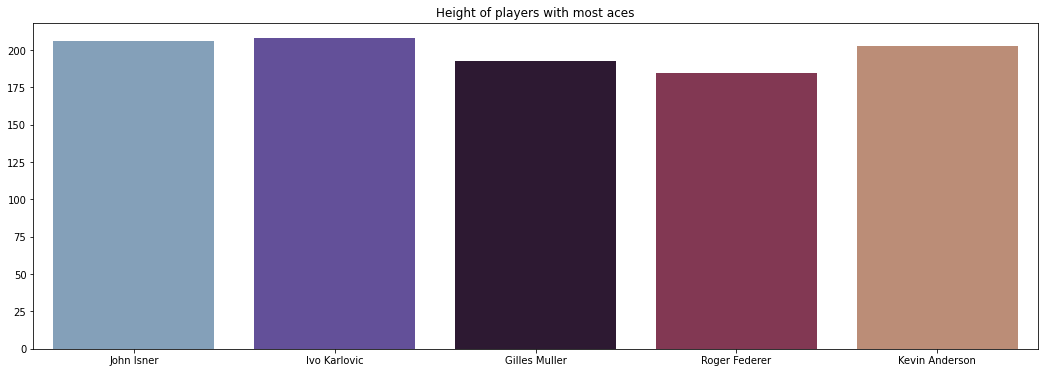

In [8]:
plt.subplots(figsize=(18,6))
sns.barplot(x = (df.nlargest(10,['w_ace']))['winner_name'].values,y = (df.nlargest(10,['w_ace']))['winner_ht'].values,palette='twilight')
plt.title('Height of players with most aces')
plt.show()

In [9]:
(df.nsmallest(1,['winner_age']))['winner_name'].values

array(['Laith Azzouni'], dtype=object)

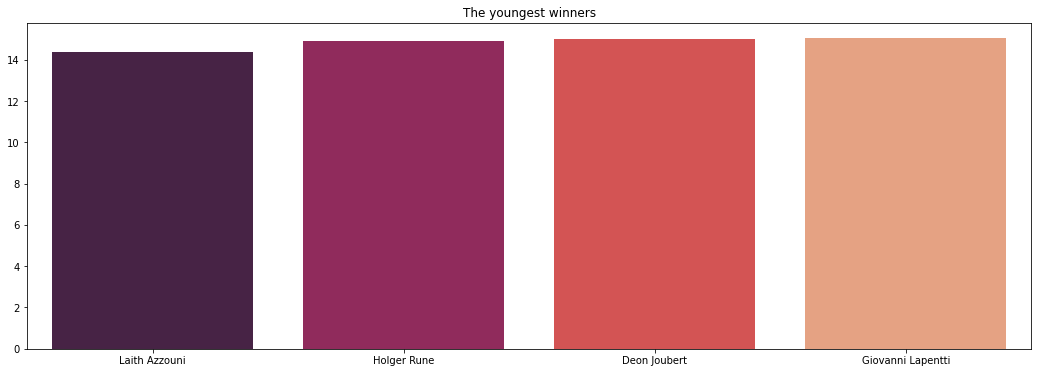

In [10]:
plt.subplots(figsize=(18,6))
sns.barplot(x = (df.nsmallest(5,['winner_age']))['winner_name'].values,y = (df.nsmallest(5,['winner_age']))['winner_age'].values,palette='rocket')
plt.title('The youngest winners')
plt.show()

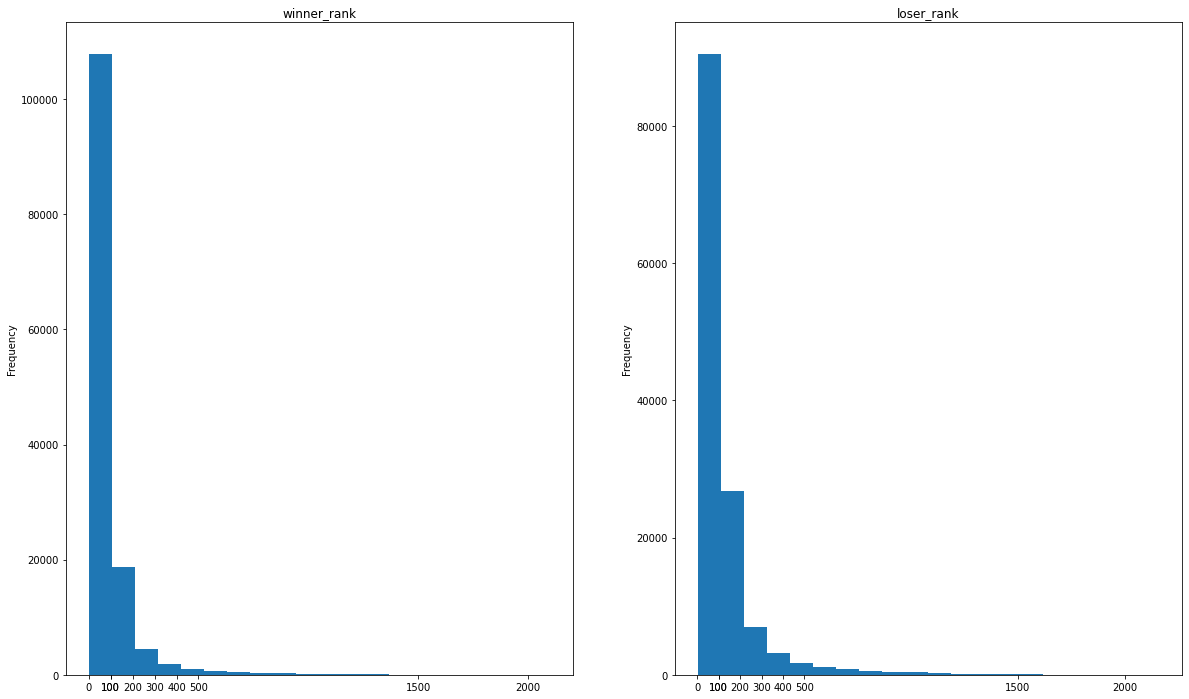

In [11]:
compareFeatures = ['winner_rank','loser_rank']

plt.figure(1, figsize=(20,12))

for i in range(0,len(compareFeatures)):
    plt.subplot(1,2,i+1)
    df[compareFeatures[i]].plot.hist(title=compareFeatures[i], bins = 20, xticks = [0,100,200,300,400,500,100,1500,2000])

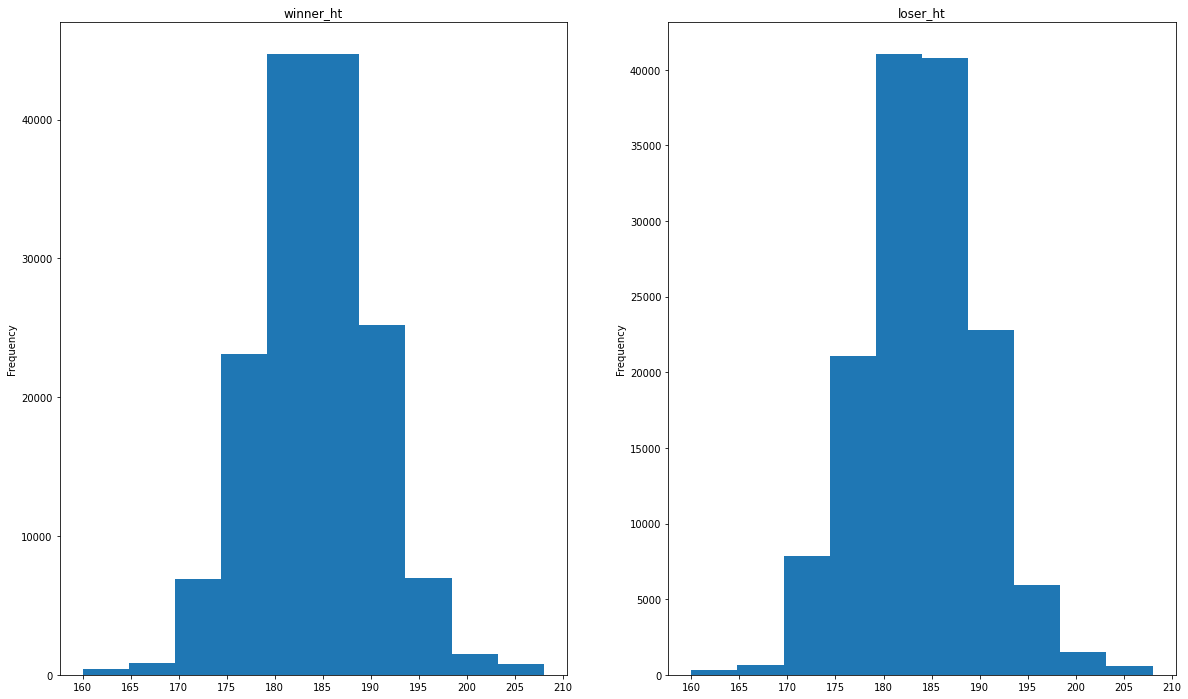

In [12]:
compareFeatures = ['winner_ht','loser_ht']

plt.figure(1, figsize=(20,12))

for i in range(0,len(compareFeatures)):
    plt.subplot(1,2,i+1)
    df[compareFeatures[i]].plot.hist(title=compareFeatures[i], xticks = [160,165,170,175,180,185,190,195,200,205,210])

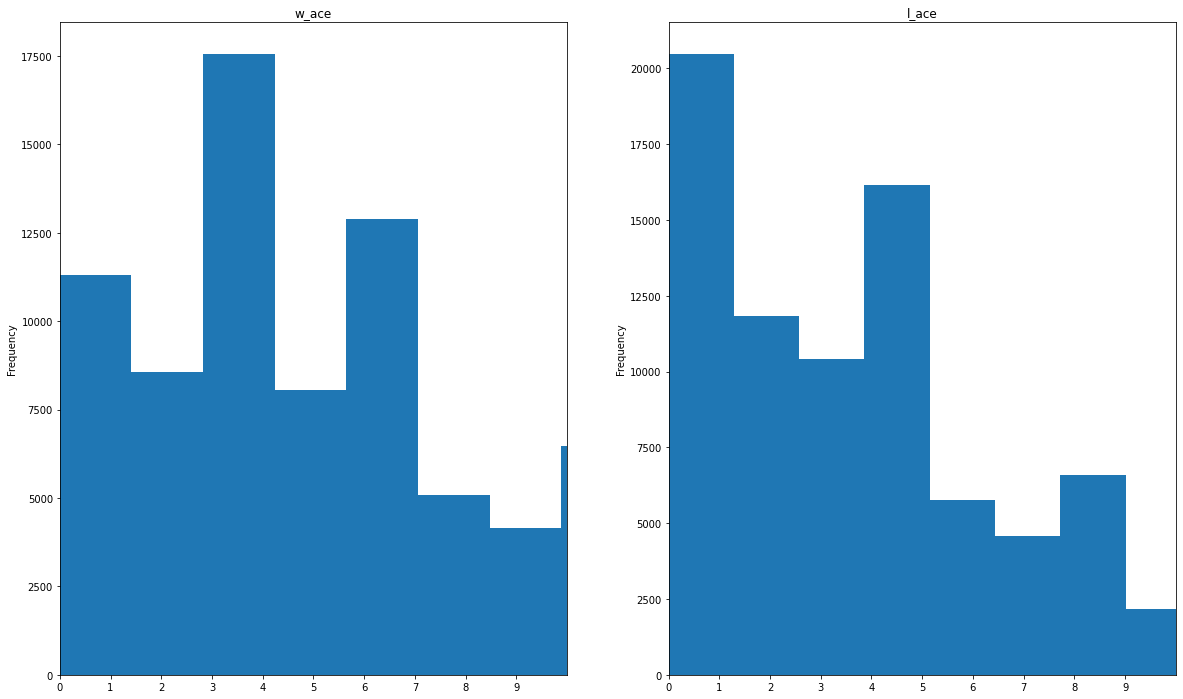

In [13]:
compareFeatures = ['w_ace','l_ace']

plt.figure(1, figsize=(20,12))

for i in range(0,len(compareFeatures)):
    plt.subplot(1,2,i+1)
    df[compareFeatures[i]].plot.hist(title=compareFeatures[i], xlim = (0,10),bins = 80, xticks= list(range(0,10,1)))

In [14]:
len(df.query('w_ace > l_ace')) / len(df)

0.286739118193592

In [15]:
a = len(df.query('w_ace > l_ace'))
b = len(df)

In [16]:
"{0:.0f}%".format(len(df.query('w_ace > l_ace'))/len(df)*100)

'29%'

In [17]:
"{0:.0f}%".format(len(df.query('loser_rank > winner_rank'))/len(df)*100)

'49%'

In [18]:
"{0:.0f}%".format(len(df.query('winner_rank > loser_rank'))/len(df)*100)

'25%'

In [19]:
df['winner_rank'].isnull().sum() + df['loser_rank'].isnull().sum()

85441

In [20]:
"{0:.0f}%".format((49/74)*100)

'66%'

In [21]:
"{0:.0f}%".format((25/74)*100)

'34%'

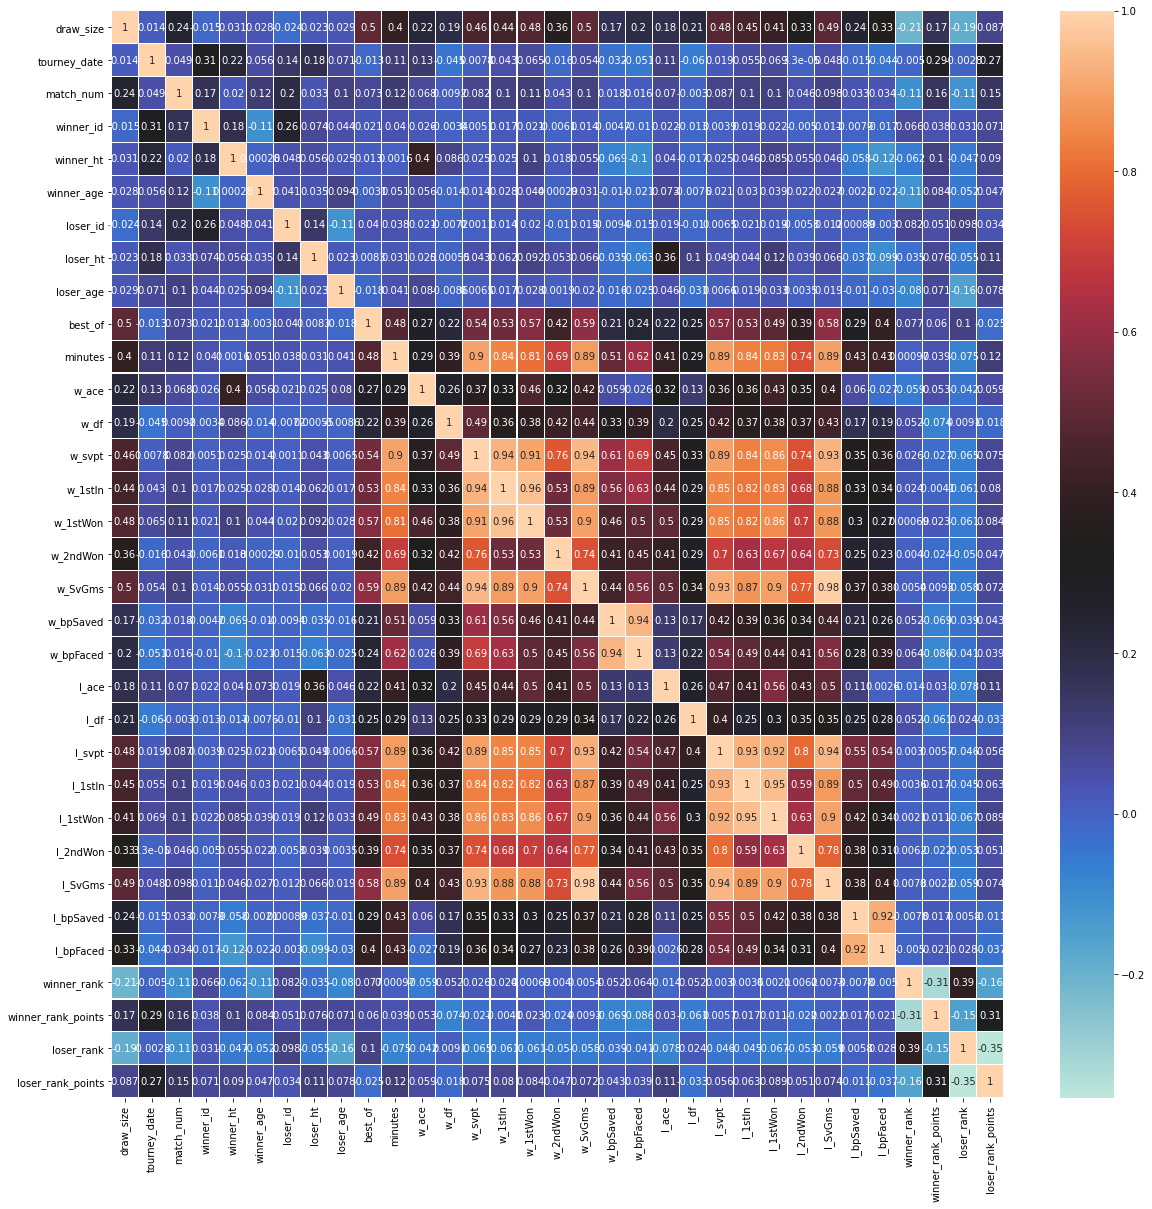

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot= True, linewidth=0.1, cmap= 'icefire')

In [23]:
df['surface'].value_counts()

Hard      70025
Clay      64229
Grass     20405
Carpet    20294
Name: surface, dtype: int64

In [24]:
df[df['surface'] == 'Hard']['w_ace'].sum() + df[df['surface'] == 'Hard']['l_ace'].sum()

542862.0

In [25]:
surfaces = ['Hard', 'Clay', 'Grass', 'Carpet']
values = [(df[df['surface'] == i]['w_ace'].sum() + df[df['surface'] == i]['l_ace'].sum()) for i in surfaces]

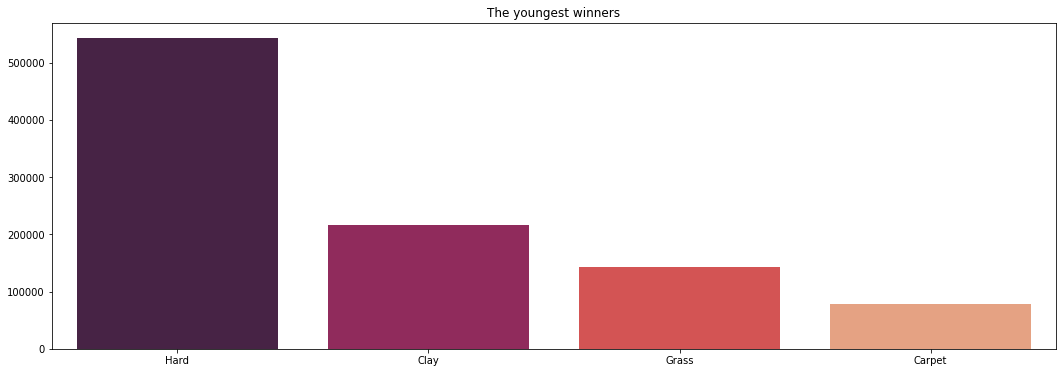

In [27]:
plt.subplots(figsize=(18,6))
sns.barplot(x = surfaces,y = values,palette='rocket')
plt.title('The youngest winners')
plt.show()

In [28]:
surfaces = ['Hard', 'Clay', 'Grass', 'Carpet']
values = [(df[df['surface'] == i]['w_ace'].sum() + df[df['surface'] == i]['l_ace'].sum()) / len(df[df['surface'] == i]) for i in surfaces]

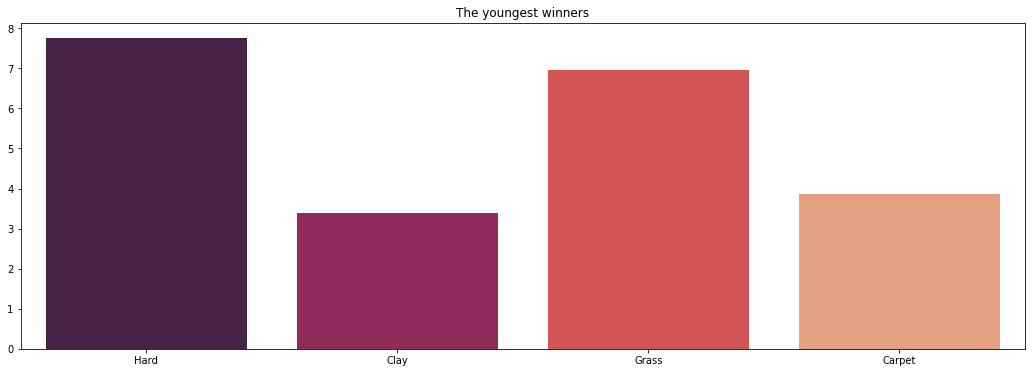

In [29]:
plt.subplots(figsize=(18,6))
sns.barplot(x = surfaces,y = values,palette='rocket')
plt.title('The youngest winners')
plt.show()

In [53]:
df = df[df['tourney_date'] > 20000101]

In [54]:
df = df.drop(columns = ['score', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon','w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced','l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_2ndWon','l_SvGms','l_bpSaved','l_bpFaced','winner_name', 'loser_name', 'tourney_id'])

In [55]:
df.columns

Index(['tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
       'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age',
       'best_of', 'round', 'winner_rank', 'winner_rank_points', 'loser_rank',
       'loser_rank_points'],
      dtype='object')

In [56]:
df.isna().sum()

tourney_name              0
surface                 198
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           36981
winner_entry          55604
winner_hand              18
winner_ht              6213
winner_ioc                0
winner_age               20
loser_id                  0
loser_seed            48850
loser_entry           50739
loser_hand               50
loser_ht               9089
loser_ioc                 0
loser_age                35
best_of                   0
round                     0
winner_rank             517
winner_rank_points      517
loser_rank             1332
loser_rank_points      1332
dtype: int64

In [57]:
df.isna().sum()/len(df)*100

tourney_name           0.000000
surface                0.313321
draw_size              0.000000
tourney_level          0.000000
tourney_date           0.000000
match_num              0.000000
winner_id              0.000000
winner_seed           58.519796
winner_entry          87.989366
winner_hand            0.028484
winner_ht              9.831630
winner_ioc             0.000000
winner_age             0.031649
loser_id               0.000000
loser_seed            77.301643
loser_entry           80.290850
loser_hand             0.079121
loser_ht              14.382695
loser_ioc              0.000000
loser_age              0.055385
best_of                0.000000
round                  0.000000
winner_rank            0.818116
winner_rank_points     0.818116
loser_rank             2.107795
loser_rank_points      2.107795
dtype: float64

In [9]:
dfCheckpoint = df

In [58]:
df = df.drop(columns = ['winner_seed', 'loser_seed', 'winner_entry', 'loser_entry'])

In [59]:
winner_height_mean = df['winner_ht'].sum()/len(df)
loser_height_mean = df['loser_ht'].sum()/len(df)

In [60]:
df['winner_ht'] = df['winner_ht'].fillna(winner_height_mean)
df['loser_ht'] = df['loser_ht'].fillna(loser_height_mean)

In [61]:
df['winner_ht'].isna().any() or df['loser_ht'].isna().any()

False

In [62]:
df.isna().sum()/len(df)*100

tourney_name          0.000000
surface               0.313321
draw_size             0.000000
tourney_level         0.000000
tourney_date          0.000000
match_num             0.000000
winner_id             0.000000
winner_hand           0.028484
winner_ht             0.000000
winner_ioc            0.000000
winner_age            0.031649
loser_id              0.000000
loser_hand            0.079121
loser_ht              0.000000
loser_ioc             0.000000
loser_age             0.055385
best_of               0.000000
round                 0.000000
winner_rank           0.818116
winner_rank_points    0.818116
loser_rank            2.107795
loser_rank_points     2.107795
dtype: float64

In [63]:
winner_rank_mean = df['winner_rank'].sum()/len(df)
winner_rank_points_mean = df['winner_rank_points'].sum()/len(df)
loser_rank_mean = df['loser_rank'].sum()/len(df)
loser_rank_points_mean = df['loser_rank_points'].sum()/len(df)
winner_age_mean = df['winner_age'].sum()/len(df)
loser_age_mean = df['loser_age'].sum()/len(df)

In [64]:
df['winner_rank'] = df['winner_rank'].fillna(winner_rank_mean)
df['loser_rank'] = df['loser_rank'].fillna(loser_rank_mean)
df['winner_rank_points'] = df['winner_rank_points'].fillna(winner_rank_points_mean)
df['loser_rank_points'] = df['loser_rank_points'].fillna(loser_rank_points_mean)
df['winner_age'] = df['winner_age'].fillna(winner_age_mean)
df['loser_age']= df['loser_age'].fillna(loser_age_mean)

In [65]:
winner_age_mean = df['winner_age'].sum()/len(df)
loser_age_mean = df['loser_age'].sum()/len(df)
df['winner_age'] = df['winner_age'].fillna(winner_age_mean)
df['loser_age']= df['loser_age'].fillna(loser_age_mean)

In [66]:
df.isna().sum()/len(df)*100

tourney_name          0.000000
surface               0.313321
draw_size             0.000000
tourney_level         0.000000
tourney_date          0.000000
match_num             0.000000
winner_id             0.000000
winner_hand           0.028484
winner_ht             0.000000
winner_ioc            0.000000
winner_age            0.000000
loser_id              0.000000
loser_hand            0.079121
loser_ht              0.000000
loser_ioc             0.000000
loser_age             0.000000
best_of               0.000000
round                 0.000000
winner_rank           0.000000
winner_rank_points    0.000000
loser_rank            0.000000
loser_rank_points     0.000000
dtype: float64

In [67]:
df['winner_hand'].value_counts()

R    54914
L     7679
U      583
Name: winner_hand, dtype: int64

In [68]:
df['loser_hand'].value_counts()

R    53660
L     8199
U     1285
Name: loser_hand, dtype: int64

In [69]:
df['winner_hand'] = df['winner_hand'].fillna('R')

In [70]:
df['loser_hand'] = df['loser_hand'].fillna('R')

In [71]:
df.isna().sum()/len(df)*100

tourney_name          0.000000
surface               0.313321
draw_size             0.000000
tourney_level         0.000000
tourney_date          0.000000
match_num             0.000000
winner_id             0.000000
winner_hand           0.000000
winner_ht             0.000000
winner_ioc            0.000000
winner_age            0.000000
loser_id              0.000000
loser_hand            0.000000
loser_ht              0.000000
loser_ioc             0.000000
loser_age             0.000000
best_of               0.000000
round                 0.000000
winner_rank           0.000000
winner_rank_points    0.000000
loser_rank            0.000000
loser_rank_points     0.000000
dtype: float64

In [72]:
df['surface'].value_counts()

Hard      33893
Clay      20669
Grass      6410
Carpet     2024
Name: surface, dtype: int64

In [73]:
df[df['surface'].isna()]['tourney_date'].value_counts()

20140131    111
20170203     76
20170217      4
20140912      4
20140127      3
Name: tourney_date, dtype: int64

In [74]:
len(df)

63194

In [26]:
dfcheckpoint2 = df

In [75]:
df.dropna(axis = 0, how='any', inplace=True)

In [76]:
df.isna().any()

tourney_name          False
surface               False
draw_size             False
tourney_level         False
tourney_date          False
match_num             False
winner_id             False
winner_hand           False
winner_ht             False
winner_ioc            False
winner_age            False
loser_id              False
loser_hand            False
loser_ht              False
loser_ioc             False
loser_age             False
best_of               False
round                 False
winner_rank           False
winner_rank_points    False
loser_rank            False
loser_rank_points     False
dtype: bool

In [77]:
df.columns

Index(['tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
       'match_num', 'winner_id', 'winner_hand', 'winner_ht', 'winner_ioc',
       'winner_age', 'loser_id', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'best_of', 'round', 'winner_rank', 'winner_rank_points',
       'loser_rank', 'loser_rank_points'],
      dtype='object')

In [78]:
df = df.drop(columns = ['winner_ioc', 'loser_ioc'])


In [79]:
df = df.drop(columns=['match_num'])

In [80]:
df.columns

Index(['tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
       'winner_id', 'winner_hand', 'winner_ht', 'winner_age', 'loser_id',
       'loser_hand', 'loser_ht', 'loser_age', 'best_of', 'round',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [81]:
df['winner_rank_points']

3334       1385.0
3335       1001.0
3336       2156.0
3337        570.0
3338        689.0
           ...   
174337    11420.0
174338     6430.0
174339     4605.0
174340     6430.0
174341     1060.0
Name: winner_rank_points, Length: 62996, dtype: float64

In [82]:
df['tourney_year'] = df['tourney_date'].astype(str).str[:4].astype(int)
df['tourney_month'] = df['tourney_date'].astype(str).str[4:6].astype(int)

In [83]:
df = df.drop(columns = ['tourney_date'])

In [36]:
df['rank_difference'] = df['winner_rank'] - df['loser_rank']
df['rank_points_difference'] = df['winner_rank_points'] - df['loser_rank_points']

In [84]:
df.columns

Index(['tourney_name', 'surface', 'draw_size', 'tourney_level', 'winner_id',
       'winner_hand', 'winner_ht', 'winner_age', 'loser_id', 'loser_hand',
       'loser_ht', 'loser_age', 'best_of', 'round', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points', 'tourney_year',
       'tourney_month'],
      dtype='object')

In [85]:
len(df)

62996

In [86]:
first_player_id = []
second_player_id = []
first_player_hand = []
second_player_hand = []
first_player_ht = []
second_player_ht = []
first_player_age =[]
second_player_age = []
first_player_rank = []
second_player_rank = []
first_player_rank_points = []
second_player_rank_points = []
labels = []
for i in range(0,len(df)):
    choice = np.random.choice([0,1],1)
    if (choice == 0):
        first_player_id.append(df.iloc[i]['winner_id'])
        second_player_id.append(df.iloc[i]['loser_id'])
        first_player_hand.append(df.iloc[i]['winner_hand'])
        second_player_hand.append(df.iloc[i]['loser_hand'])
        first_player_ht.append(df.iloc[i]['winner_ht'])
        second_player_ht.append(df.iloc[i]['loser_ht'])
        first_player_age.append(df.iloc[i]['winner_age'])
        second_player_age.append(df.iloc[i]['loser_age'])
        first_player_rank.append(df.iloc[i]['winner_rank'])
        second_player_rank.append(df.iloc[i]['loser_rank'])
        first_player_rank_points.append(df.iloc[i]['winner_rank_points'])
        second_player_rank_points.append(df.iloc[i]['loser_rank_points'])
    else:
        first_player_id.append(df.iloc[i]['loser_id'])
        second_player_id.append(df.iloc[i]['winner_id'])
        first_player_hand.append(df.iloc[i]['loser_hand'])
        second_player_hand.append(df.iloc[i]['winner_hand'])
        first_player_ht.append(df.iloc[i]['loser_ht'])
        second_player_ht.append(df.iloc[i]['winner_ht'])
        first_player_age.append(df.iloc[i]['loser_age'])
        second_player_age.append(df.iloc[i]['winner_age'])
        first_player_rank.append(df.iloc[i]['loser_rank'])
        second_player_rank.append(df.iloc[i]['winner_rank'])
        first_player_rank_points.append(df.iloc[i]['loser_rank_points'])
        second_player_rank_points.append(df.iloc[i]['winner_rank_points'])
    labels.append(choice)

In [87]:
df['winner_id'] = first_player_id
df['loser_id'] = second_player_id
df['winner_hand'] = first_player_hand
df['loser_hand'] = second_player_hand
df['winner_ht'] = first_player_ht
df['loser_ht'] = second_player_ht
df['winner_age'] = first_player_age
df['loser_age'] = second_player_age
df['winner_rank'] = first_player_rank
df['loser_rank'] = second_player_rank
df['winner_rank_points'] = first_player_rank_points
df['loser_rank_points'] = second_player_rank_points
df['outcome'] = labels
df['outcome'] = df['outcome'].astype('int')

In [88]:
len(df)

62996

In [89]:
df.rename(columns = {'winner_id':'first_player_id', 'winner_hand':'first_player_hand', 'winner_ht':'first_player_ht'
                    ,'winner_age':'first_player_age','winner_rank':'first_player_rank','winner_rank_points':'first_player_rank_points'
                     ,'loser_id':'second_player_id', 'loser_hand':'second_player_hand','loser_ht':'second_player_ht'
                    ,'loser_age':'second_player_age','loser_rank':'second_player_rank','loser_rank_points':'second_player_rank_points'}, inplace = True)

In [90]:
df.columns

Index(['tourney_name', 'surface', 'draw_size', 'tourney_level',
       'first_player_id', 'first_player_hand', 'first_player_ht',
       'first_player_age', 'second_player_id', 'second_player_hand',
       'second_player_ht', 'second_player_age', 'best_of', 'round',
       'first_player_rank', 'first_player_rank_points', 'second_player_rank',
       'second_player_rank_points', 'tourney_year', 'tourney_month',
       'outcome'],
      dtype='object')

In [91]:
df['rank_difference'] = df['first_player_rank'] - df['second_player_rank']
df['rank_points_difference'] = df['first_player_rank_points'] - df['second_player_rank_points']

In [92]:
df.columns

Index(['tourney_name', 'surface', 'draw_size', 'tourney_level',
       'first_player_id', 'first_player_hand', 'first_player_ht',
       'first_player_age', 'second_player_id', 'second_player_hand',
       'second_player_ht', 'second_player_age', 'best_of', 'round',
       'first_player_rank', 'first_player_rank_points', 'second_player_rank',
       'second_player_rank_points', 'tourney_year', 'tourney_month', 'outcome',
       'rank_difference', 'rank_points_difference'],
      dtype='object')

In [128]:
dfCheckpoint3 = df

In [94]:
one_hot = pd.get_dummies(df['surface'], prefix=['surface'])
df = df.drop(['surface'],axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['tourney_name'], prefix=['tourney_name'])
df = df.drop(['tourney_name'],axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['tourney_level'], prefix =['tourney_level'])
df = df.drop(['tourney_level'],axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['first_player_id'], prefix =['first_player_id'])
df = df.drop(['first_player_id'],axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['first_player_hand'], prefix =['first_player_hand'])
df = df.drop(['first_player_hand'],axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['second_player_id'],prefix=['second_player_id'])
df = df.drop(['second_player_id'],axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['second_player_hand'], prefix = ['second_player_hand'])
df = df.drop(['second_player_hand'],axis = 1)
df = df.join(one_hot)
one_hot = pd.get_dummies(df['round'], prefix = ['round'])
df = df.drop(['round'],axis = 1)
df = df.join(one_hot)

In [95]:
df.shape

(62996, 5558)

In [143]:
dfCheckpoint4 = df

In [96]:
y = df['outcome']
df_X = df.drop(columns='outcome')

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2,random_state=6666)

In [107]:
from sklearn.linear_model import LogisticRegression
for c in [0.001, 0.003, 0.006, 0.1, 0.2, 0.4, 1.0, 3.0, 6.0]:
    model = LogisticRegression(C=c, solver = 'liblinear')
    model.fit(X_train, y_train)
    
    print("C={:f} train: {:f} test: {:f}".format(c, model.score(X_train, y_train), model.score(X_test, y_test)))

C=0.001000 train: 0.653623 test: 0.652302
C=0.003000 train: 0.654100 test: 0.652143
C=0.006000 train: 0.656064 test: 0.653254
C=0.100000 train: 0.654397 test: 0.653095
C=0.200000 train: 0.653782 test: 0.652063
C=0.400000 train: 0.656719 test: 0.652857
C=1.000000 train: 0.654615 test: 0.652778
C=3.000000 train: 0.683169 test: 0.671429
C=6.000000 train: 0.653683 test: 0.652302


In [115]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(estimator=model,cv = 3, param_grid = {'n_estimators': [5,10,50, 200],
                              'max_depth': [1,5,8, 30,50]})
search.fit(X_train, y_train)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
19,1,0.706604,"{'max_depth': 50, 'n_estimators': 200}"
18,2,0.704540,"{'max_depth': 50, 'n_estimators': 50}"
14,3,0.696781,"{'max_depth': 30, 'n_estimators': 50}"
15,4,0.696404,"{'max_depth': 30, 'n_estimators': 200}"
17,5,0.693249,"{'max_depth': 50, 'n_estimators': 10}"
13,6,0.690829,"{'max_depth': 30, 'n_estimators': 10}"
10,7,0.685134,"{'max_depth': 8, 'n_estimators': 50}"
11,8,0.684915,"{'max_depth': 8, 'n_estimators': 200}"
7,9,0.684499,"{'max_depth': 5, 'n_estimators': 200}"
12,10,0.684022,"{'max_depth': 30, 'n_estimators': 5}"


In [87]:
print(model.coef_, model.intercept_)

[[ 0.00382084 -0.08464356  0.06974113 ... -0.06654914 -0.15898321
  -0.20132723]] [-0.03754005]


In [108]:
explain = pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_)), columns=['features', 'coef'])

In [109]:
explain

,features,coef
0,draw_size,[7.664390623941702e-05]
1,first_player_ht,[-0.029362303044813035]
2,first_player_age,[0.024137111983015356]
3,second_player_ht,[0.02763817331359704]
4,second_player_age,[-0.029248091000318596]
...,...,...
5552,['round']_R16,[-0.0003158635576907561]
5553,['round']_R32,[-0.000268519567268823]
5554,['round']_R64,[2.9157750569200605e-05]
5555,['round']_RR,[0.00014202060691092985]


In [96]:
explain['coef'] = explain['coef'].astype('float')

In [124]:
explain.nsmallest(10,columns=['coef'])

,features,coef
1674,['first_player_id']_101736,-2.338144
2871,['first_player_id']_105676,-1.869222
2206,['first_player_id']_103720,-1.693079
4820,['second_player_id']_105668,-1.682902
1755,['first_player_id']_102158,-1.646721
2037,['first_player_id']_103206,-1.635151
3055,['first_player_id']_106421,-1.626048
4818,['second_player_id']_105657,-1.600587
1876,['first_player_id']_102701,-1.583485
4523,['second_player_id']_104736,-1.573412


In [114]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=7777, n_estimators = 50).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))


train score: 0.9999404714659894
test score:  0.7115079365079365


In [99]:
df2 = pd.read_csv('data/matches/all_matches.csv', low_memory=False)

In [125]:
df2[df2['winner_id'] == 104736]['winner_name']

14955     Farrukh Dustov
22312     Farrukh Dustov
37543     Farrukh Dustov
59464     Farrukh Dustov
62699     Farrukh Dustov
69724     Farrukh Dustov
94117     Farrukh Dustov
110650    Farrukh Dustov
127763    Farrukh Dustov
171708    Farrukh Dustov
172302    Farrukh Dustov
Name: winner_name, dtype: object

In [122]:
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [123]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=7777, n_estimators = 10).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("val score: ", model.score(X_val, y_val))
print("test score: ", model.score(X_test, y_test))

train score: 0.9980950869116596
val score:  0.913485197237876
test score:  0.9136507936507936
